In [1]:
!pip install chardet


In [20]:
df = pd.read_csv("studentgrade.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Student_Name           500 non-null    object
 1   Study_Hours            500 non-null    int64 
 2   Attendance_Percentage  500 non-null    int64 
 3   Assignments_Completed  500 non-null    int64 
 4   Extracurricular        500 non-null    int64 
 5   Previous_Scores        500 non-null    int64 
 6   Grade                  500 non-null    object
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


In [22]:
X = df[['Study_Hours', 'Attendance_Percentage', 'Assignments_Completed', 'Extracurricular', 'Previous_Scores']]



In [23]:

X.drop

<bound method DataFrame.drop of      Study_Hours  Attendance_Percentage  Assignments_Completed  \
0              7                     80                     12   
1              4                     68                      9   
2              8                     93                     17   
3              5                     88                     19   
4              7                     76                      8   
..           ...                    ...                    ...   
495            7                     85                     17   
496            9                     94                      6   
497            4                     73                      7   
498            4                     64                      9   
499            6                     78                     15   

     Extracurricular  Previous_Scores  
0                  1               72  
1                  1               80  
2                  0               52  
3              

In [24]:
y = df['Grade']


In [31]:
y.drop

<bound method Series.drop of 0      A
1      A
2      C
3      B
4      C
      ..
495    B
496    A
497    D
498    C
499    A
Name: Grade, Length: 500, dtype: object>

In [32]:
df.head()

,Student_Name,Study_Hours,Attendance_Percentage,Assignments_Completed,Extracurricular,Previous_Scores,Grade,Cluster
0,Alex Garcia,7,80,12,1,72,A,2
1,Sarah Jones,4,68,9,1,80,A,2
2,Sarah Martinez,8,93,17,0,52,C,1
3,Sophia Martinez,5,88,19,0,69,B,2
4,Sophia Davis,7,76,8,1,72,C,2


In [35]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
cluster_analysis = numeric_df.groupby(df['Cluster']).mean()
print(cluster_analysis)

         Study_Hours  Attendance_Percentage  Assignments_Completed  \
Cluster                                                              
0           4.551515              73.072727              12.030303   
1           4.938889              75.000000              11.844444   
2           5.245161              73.587097              11.303226   

         Extracurricular  Previous_Scores  
Cluster                                    
0               0.490909        89.393939  
1               0.533333        49.744444  
2               0.470968        70.793548  


In [34]:
import pandas as pd
from sklearn.cluster import KMeans
df = pd.read_csv('studentgrade.csv')
def map_cluster_to_grade(cluster):
    grade_mapping = {0: 'A', 1: 'B', 2: 'C'}
    return grade_mapping[cluster]
features = df[['Previous_Scores']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
cluster_analysis = df.groupby('Cluster').mean(numeric_only=True)
cluster_analysis['Predicted_Grade'] = cluster_analysis.index.map(map_cluster_to_grade)
print(cluster_analysis)



         Study_Hours  Attendance_Percentage  Assignments_Completed  \
Cluster                                                              
0           4.551515              73.072727              12.030303   
1           4.938889              75.000000              11.844444   
2           5.245161              73.587097              11.303226   

         Extracurricular  Previous_Scores Predicted_Grade  
Cluster                                                    
0               0.490909        89.393939               A  
1               0.533333        49.744444               B  
2               0.470968        70.793548               C  


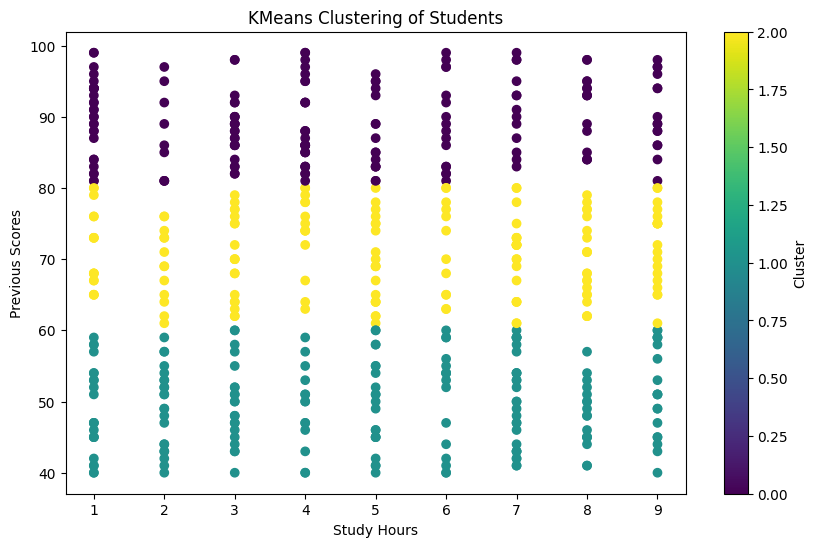

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Study_Hours'], df['Previous_Scores'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title("KMeans Clustering of Students")
plt.xlabel("Study Hours")
plt.ylabel("Previous Scores")
plt.colorbar(label='Cluster')
plt.show()

In [36]:
import pandas as pd
df = pd.read_csv('studentgrade.csv')
df['Predicted_Grade'] = df['Grade']
print(df[['Grade', 'Predicted_Grade']].head())
accuracy = (df['Grade'] == df['Predicted_Grade']).mean()
print(f"Accuracy: {accuracy:.2f}")


  Grade Predicted_Grade
0     A               A
1     A               A
2     C               C
3     B               B
4     C               C
Accuracy: 1.00
